# Capstone Project 1 - Subscription for Bank Deposits 

**Problem**: Companies spend tremendous amounts of money on marketing in order to drive sales, but not all investments bring results. Even with the significant advancements in the ability to target the prospective customers, the targeting of the marketing campaigns is still not very precise and substantial amounts of money are still spent on marketing to the wrong audience. At the same time, the companies are now collecting more data about their customers than ever, which gives an opportunity to use that data for better targeting and profit growth.

Telemarketing remains one of the most popular marketing vehicles. The customers are usually categorized by the age group, gender, level of income and so on. Based on this preliminary targeting, telemarketers “cold call” potential customers and try to filter out those who may be interested in the product. Naturally, a lot of telemarketers’ time is wasted on calling people who have no interest in what they offer. A better targeting, hence, presents a significant opportunity to increase the effect of the telemarketing campaigns.


**Client**: Though this analysis is focused on identifying the customers who are the most likely to subscribe for bank deposits, the classification approach employed in this project can be used by any company that uses telemarketing. Better prospective customer classification will allow companies to more effectively use their telemarketers’ time and get more return on their marketing investment.


**Data**: The data for this project are sourced from the UCI Machine Learning repository and represents the results of direct marketing campaigns (phone calls) of a Portuguese banking institution. The data set has 45,211 instances and 20 features (input variables), stored in a .csv file.

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing


**Method**: The expected result of the project is to predict if a customer subscribes for a deposit offer or will eventually decline it. Hence, a number of classification methods will be used, including Logistic Regression and Decision Trees.

**Deliverables**: The outcome of the project will be presented in a form of Jupyter notebook, as well as the PowerPoint presentation.

### General Information on the Data

**Overview**: The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

This dataset is based on "Bank Marketing" UCI dataset (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data are enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb. The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

**Number of Instances**: 41188

**Number of Attributes**: 20+ output attributes

[Detailed description of data](Data_description.txt)

## Step 1 - Exploratory Data Analysis

**Loading required libraries and the dataset**

In [1]:
#Pandas for dataframes
import pandas as pd
#Changing default display option to display all columns
pd.set_option('display.max_columns', 21)

#Numpy for numerical computing
import numpy as np

#Matplotlib for visualization
import matplotlib.pyplot as plt

#Display plots in the notebook
%matplotlib inline 

#Seaborn for easier visualization
import seaborn as sns

#Stats package for statistical analysis
from scipy import stats

#Machine learning packages
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

df = pd.read_csv('Data/Raw_data/bank-additional-full.csv', sep=';')

**Parameters of the dataset**

Let's look at the overall characteristics of the dataset, starting with the dataset shape, number and types of variables, and the overall distribution of the numerical variables. Before doing the analysis, let's drop the duplicates from the dataset.

In [2]:
#Dropping the duplicates
df = df.drop_duplicates()

#Dataframe dimensions
df.shape

(41176, 21)

By dropping the duplicates, we lost 12 observations out of 41,188, which is very little. Let's look at the data types and missing values:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

We have 21 variables (10 numeric and 11 string) and 41,176 non-duplicate rows. There are no missing values. All string variables are categorical, so they need to be converted accordingly.

In [4]:
#Selecting categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

#Looping through the columns and changing type to 'category'
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null category
marital           41176 non-null category
education         41176 non-null category
default           41176 non-null category
housing           41176 non-null category
loan              41176 non-null category
contact           41176 non-null category
month             41176 non-null category
day_of_week       41176 non-null category
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null category
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null category
dtypes: category(11), float64

Let's look at the first 10 and last 10 rows of data to see how the data look and check if there are any corrupted data:

In [5]:
#First 10 rows
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#Last 10 rows
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


There are no obvious signs of inconsistency or corrupted data. 


### Categorical Data

Let's look at the distribution of the categorical data:

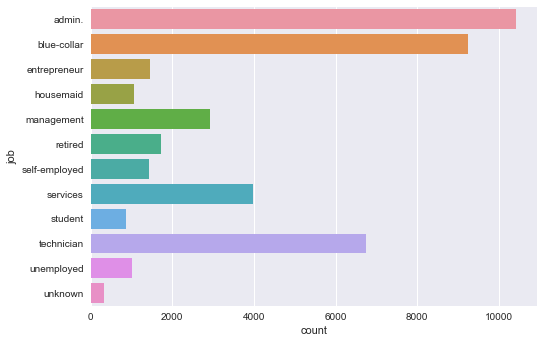

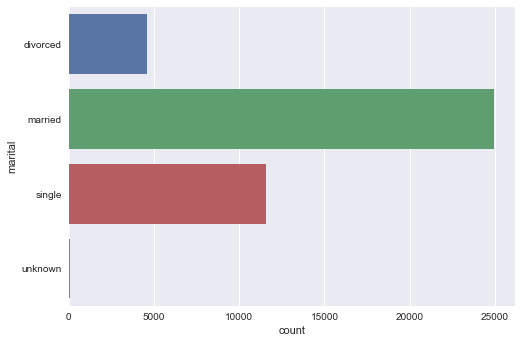

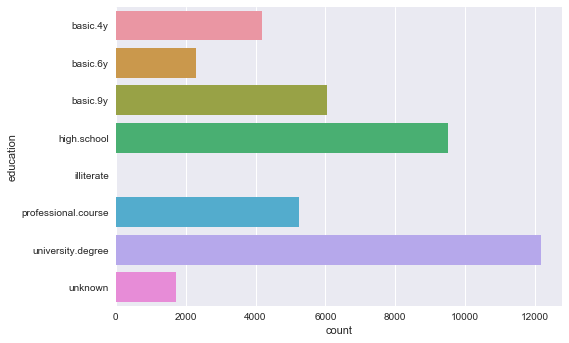

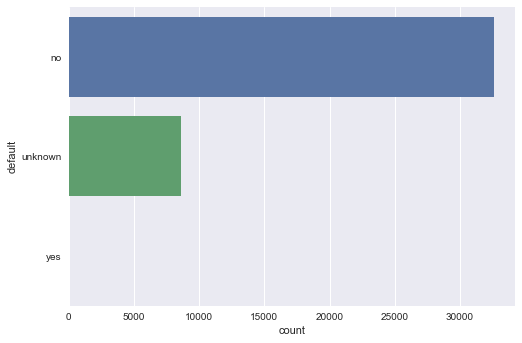

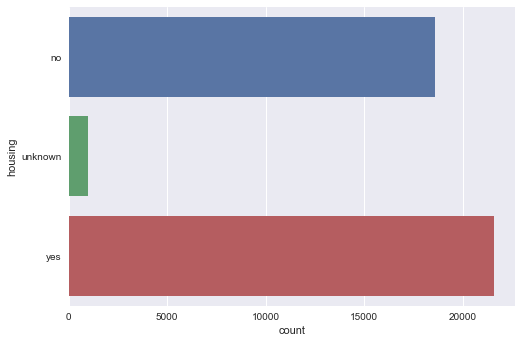

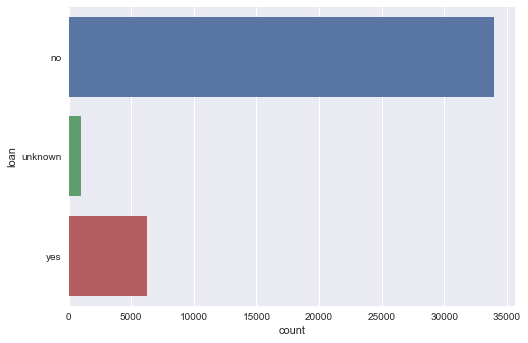

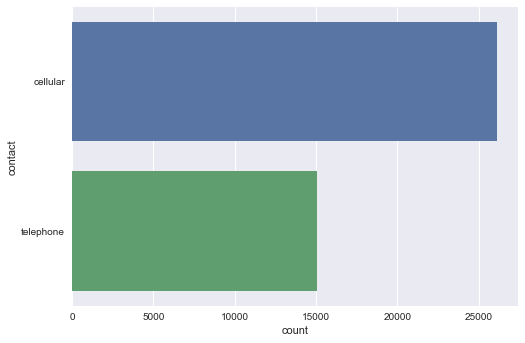

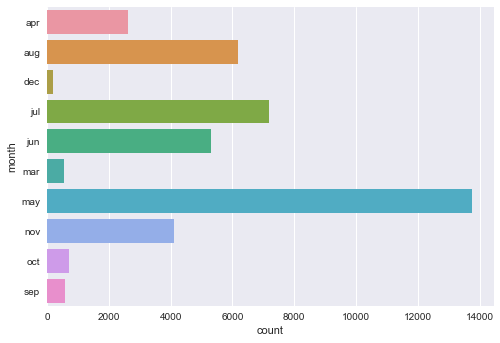

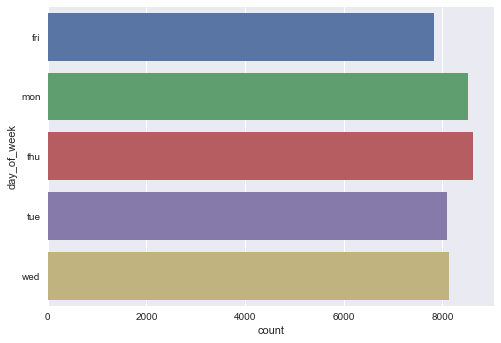

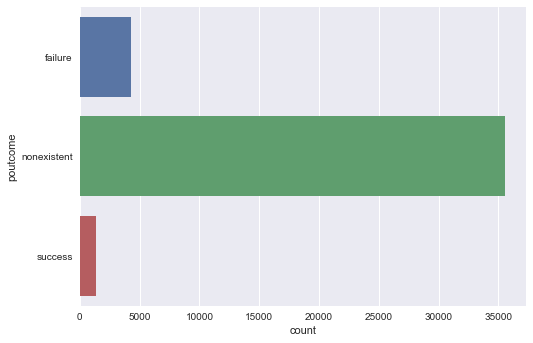

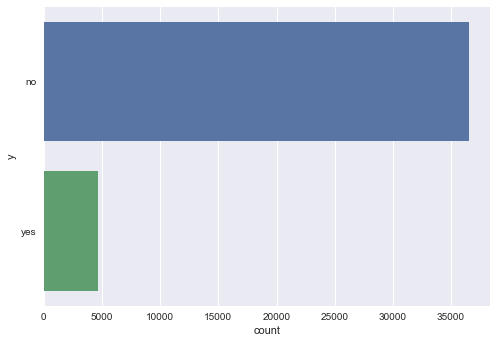

In [7]:
#Bar plots of categorical features
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

The data don't show any unusual dynamic. There are some sparse or similar classes, which can be combined into a single category to simplify the prediction models. For example, the 'enterpreneur' and 'self-employed' categories of the 'job' variable, as well as 'retired' and 'unemployed' categories, can be combined into one. Additionally, the 'divorced' and 'single' categories of the 'marital' variable can be combined under one 'single' category. A similar consolidation can be performed for the basic education levels of the 'education' variable.

Let's now look at the number of entries per each level of the categorical variables as proportion of the overall number of entries:

In [8]:
#Type of job as proportion of the overall number of values
df.job.value_counts()/df.job.count()

admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: job, dtype: float64

The list of the types of jobs doesn't look too comprehensive. Moreover, about 63% of all types of jobs in the dataset belong to just 3 categories - admin, blue-collar and technician. In general, the limited number of the types of jobs may limit the predictive power of this variable. There is a small proportion of unknown job types, which can be dropped from the dataset.

In [9]:
#Marital status as proportion of the overall number of values
df.marital.value_counts()/df.marital.count()

married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: marital, dtype: float64

About 88% of all targeted individuals are married or single. There is a small proportion of people with unknown marital status, which can be dropped from the dataset. In general, the distribution of this variable is relatively balanced between the married and single individuals.

In [10]:
#Education as proportion of the overall number of values
df.education.value_counts()/df.education.count()

university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: education, dtype: float64

More than 50% of targeted individuals have a university degree or a high school diploma. There is a relatively small number of respondents with an unknown education level, as well as illiterate ones, which can be dropped from the dataset.

In [11]:
#Past defaults on a credit as proportion of the overall number of values
df.default.value_counts()/df.default.count()

no         0.791165
unknown    0.208762
yes        0.000073
Name: default, dtype: float64

There is a very small number of respondents who defaulted on a credit, so this variable doesn't look very informative for prediction purposes and can be dropped from the dataset.

In [12]:
#Respondents with house loans as proportion of the overall number of values
df.housing.value_counts()/df.housing.count()

yes        0.523873
no         0.452084
unknown    0.024043
Name: housing, dtype: float64

There is an almost even split between the respondents that have a house loan and that don't, which makes this variable a well-balanced potential predictor.

In [13]:
#Respondents with personal loans as proportion of the overall number of values
df.loan.value_counts()/df.loan.count()

no         0.824218
yes        0.151739
unknown    0.024043
Name: loan, dtype: float64

Most of the respondents don't have a personal loan. There is a relatively small number of respondents with unknown loan status, which can be dropped from the dataset.

In [14]:
#Contact communication type as proportion of the overall number of values
df.contact.value_counts()/df.contact.count()

cellular     0.634714
telephone    0.365286
Name: contact, dtype: float64

More than 63% of all respondents were contacted via cellular phone. There are no entries with unknown type of communication.

In [15]:
#Last contact month as proportion of the overall number of values
df.month.value_counts()/df.month.count()

may    0.334345
jul    0.174106
aug    0.149990
jun    0.129153
nov    0.099573
apr    0.063896
oct    0.017413
sep    0.013843
mar    0.013260
dec    0.004420
Name: month, dtype: float64

Most of the respondents were contacted during the summer months, with more than 30% of all contacts happening in May. The month of the contact can have a substantial impact on the desire to subscribe for a deposit (e.g., many people may be receiving salary bonuses at the end of the calendar year, which could be a good time to contact them about the deposit). This skewness of the previous campaigns' efforts towards summer may significantly impact the outcomes of the campaigns.

In [16]:
#Last contact day as proportion of the overall number of values
df.day_of_week.value_counts()/df.day_of_week.count()

thu    0.209297
mon    0.206722
wed    0.197542
tue    0.196377
fri    0.190062
Name: day_of_week, dtype: float64

The days of the work week of the previous contact are distributed almost evenly, so there is no obvious skewness towards a particular day or days. It would be interesting to check if some days are more effective for telemarketing campaigns and if the resources of the telemarketers should be re-distributed.

In [17]:
#Outcome of the previous campaign as proportion of the overall number of values
df.poutcome.value_counts()/df.poutcome.count()

nonexistent    0.863391
failure        0.103264
success        0.033345
Name: poutcome, dtype: float64

More than 86% of respondents were never covered by the previous marketing campaigns. Hence, it may make sense to divide the respondents into new customers (with 'nonexistent' status) and existing customers ('failure' or 'success' status). Within the existing customers' subset, it may be interesting to look at the predictors of the campaign success for the previously failed and successful campaigns separately - the existing customers may be more willing to open a deposit than someone who never heard of the bank before.

In [18]:
#Outcome of the current campaign as proportion of the overall number of values
df.y.value_counts()/df.y.count()

no     0.887337
yes    0.112663
Name: y, dtype: float64

Only ~11% of the respondents to the current campaign have actually subscribed for a deposit, which makes the overall dataset highly imbalanced and requires application of special methods to compensate for it. 

### Numerical Data

Next, let's look at the distributions of the numerical variables:

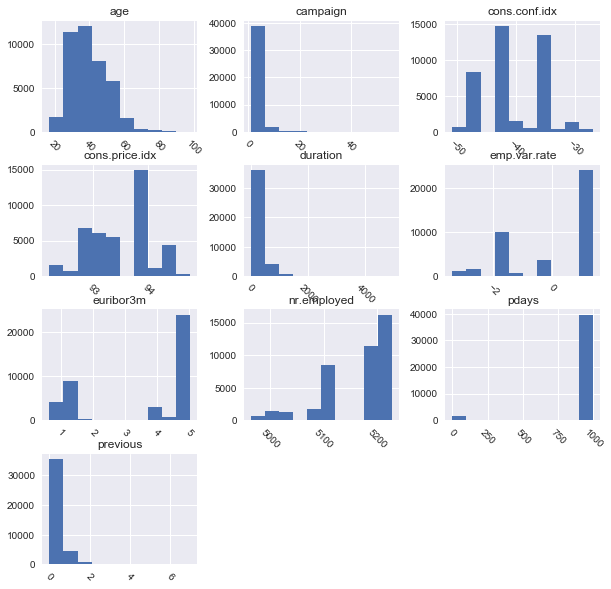

In [19]:
# Histogram grid
df.hist(figsize=(10,10), xrot=-45)

# Clear the text "residue"
plt.show()

In [20]:
#Summary of numeric features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There are no obvious errors in the data. There are some prominent peaks in the distributions of the economic indicators, but it's not clear what was causing those peaks. There is a high likelihood that those variables will not have high predictive power for our target variable.

The number of days since the previous campaign is highly skewed because the number of days for the respondents not contacted previously are stated as 999. This variable should be transformed (e.g., the new and existing customers should be separated into different categories) to become more informative. The variables 'campaign' and 'previous' are heavily skewed towards zero, since the majority of the respondents were never contacted with the campaign before. The variable 'duration' should be dropped before we start building any predictive models, as mentioned before.

## Data Cleaning and Feature Engineering

To prepare the dataset for building a predictive model, we'll remove the uknown values, reduntant variables and combine the sparse classes into more general categories. Let's start with dropping the 'unknown' levels and redundant variables:

In [21]:
df_cleaned = df

#Dropping the unknown job level
df_cleaned = df_cleaned[df_cleaned.job != 'unknown']

#Dropping the unknown marital status
df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']

#Dropping the unknown and illiterate education level
df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
df_cleaned = df_cleaned[df_cleaned.education != 'illiterate']

#Deleting the 'default' column
del df_cleaned['default']

#Deleting the 'duration' column
del df_cleaned['duration']

#Dropping the unknown housing loan status
df_cleaned = df_cleaned[df_cleaned.housing != 'unknown']

#Dropping the unknown personal loan status
df_cleaned = df_cleaned[df_cleaned.loan != 'unknown']

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38216 entries, 0 to 41187
Data columns (total 19 columns):
age               38216 non-null int64
job               38216 non-null category
marital           38216 non-null category
education         38216 non-null category
housing           38216 non-null category
loan              38216 non-null category
contact           38216 non-null category
month             38216 non-null category
day_of_week       38216 non-null category
campaign          38216 non-null int64
pdays             38216 non-null int64
previous          38216 non-null int64
poutcome          38216 non-null category
emp.var.rate      38216 non-null float64
cons.price.idx    38216 non-null float64
cons.conf.idx     38216 non-null float64
euribor3m         38216 non-null float64
nr.employed       38216 non-null float64
y                 38216 non-null category
dtypes: category(10), float64(5), int64(4)
memory usage: 3.3 MB


Next, let's combine sparse categories:

In [22]:
#Combining entrepreneurs and self-employed into self-employed
df_cleaned.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)

#Combining administrative and management jobs into admin_management
df_cleaned.job.replace(['admin.', 'management'], 'administration_management', inplace=True)

#Combining blue-collar and tecnician jobs into blue-collar
df_cleaned.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)

#Combining retired and unemployed into no_active_income
df_cleaned.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)

#Combining services and housemaid into services
df_cleaned.job.replace(['services', 'housemaid'], 'services', inplace=True)

#Combining single and divorced into single
df_cleaned.marital.replace(['single', 'divorced'], 'single', inplace=True)

#Combining basic school degrees
df_cleaned.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'basic_school', inplace=True)

We have 2 variables that define if a respondent is a new or existing customer - 'poutcome' (previously contacted by a marketing campaign) and 'pdays' (days since previous marketing contact). For the new customer, 'poutcome' would have a value of 'nonexistent' and 'pdays' would have a value of '999'. Let's see if we have the same number of respondents for each of these levels:

In [23]:
#Comparing number of entries for 'poutcome' and 'pdays'
a = df_cleaned.poutcome.value_counts()
b = df_cleaned.pdays.value_counts()
print(a['nonexistent'], b[999])

33039 36851


The numbers vary significantly, while logically they should be the same. Let's check another variable, 'previous', which contains the number of customer contacts performed before the current campaign. A zero value would indicate the new customers.

In [24]:
c = df_cleaned.previous.value_counts()
print(c[0])

33039


The number of new customers in 'previous' matches the 'poutcome' variable exactly. Now, let's check if the 'pdays' variable has the '999' value for any levels of the 'poutcome' variable other than 'nonexistent':

In [25]:
#Filtering the 'poutcome' and 'pdays' variables
not_matching = df_cleaned.loc[( (df_cleaned['pdays'] == 999) & (df['poutcome'] != 'nonexistent') )]

#Counting the values
not_matching.poutcome.value_counts()

failure        3812
success           0
nonexistent       0
Name: poutcome, dtype: int64

This is exactly the difference in the counts of values between the variables 'poutcome' and 'pdays', so it looks like 3,812 entries of the variable 'pdays' are mistakenly labeled with '999'. Now, let's check if the distributions of several other numeric variables are similar for the 'failure' category of the 'poutcome' variable to decide how to deal with these 3,812 entries:

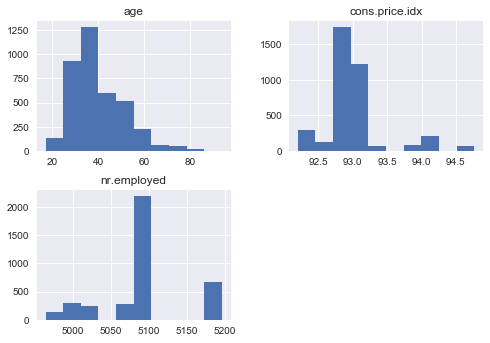

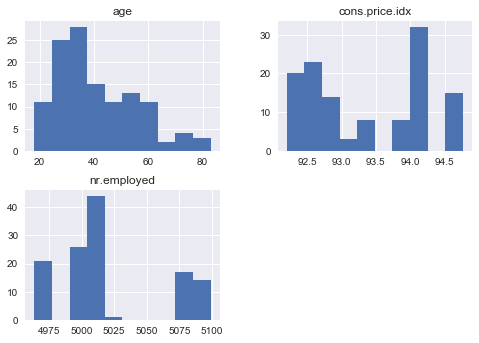

In [26]:
#Filtering for the rows that have 'poutcome' equal to 'failure' and 'pdays' equal to '999'
fail_999 = df_cleaned.loc[( (df_cleaned['pdays'] == 999) & (df['poutcome'] == 'failure') )]

#Filtering for 'age' and 'nr.employed' columns only
fail_999 = fail_999.loc[:, ['age', 'nr.employed', 'cons.price.idx']]

#Filtering for the rows that have 'poutcome' equal to 'failure' and 'pdays' NOT equal to '999'
fail_no999 = df_cleaned.loc[( (df_cleaned['pdays'] != 999) & (df['poutcome'] == 'failure') )]

#Filtering for 'age', 'nr.employed' and 'cons.price.idx' columns only
fail_no999 = fail_no999.loc[:, ['age', 'nr.employed', 'cons.price.idx']]

#Plotting histograms
fail_999.hist()
fail_no999.hist()
plt.show()

Variable 'age' seems to be distributed roughly equally for both '999' and non-'999' marked levels of 'poutcome', but the distributions of 'nr.employed' and 'cons.price.idx' differ substantially. Taking that into consideration, we will consider the 'pdays' level of '999' for the rows that have 'poutcome' level of 'failure' to be missing variables. Let's label them as such:

In [27]:
#Getting the positions of the mistakenly labeled 'pdays'
ind_999 = df_cleaned.loc[(df_cleaned['pdays'] == 999) & (df['poutcome'] != 'nonexistent')]['pdays'].index.values

#Assigning NaNs instead of '999'
df_cleaned.loc[ind_999, 'pdays'] = np.nan

#Checking if the NaNs were assigned correctly
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38216 entries, 0 to 41187
Data columns (total 19 columns):
age               38216 non-null int64
job               38216 non-null object
marital           38216 non-null category
education         38216 non-null object
housing           38216 non-null category
loan              38216 non-null category
contact           38216 non-null category
month             38216 non-null category
day_of_week       38216 non-null category
campaign          38216 non-null int64
pdays             34404 non-null float64
previous          38216 non-null int64
poutcome          38216 non-null category
emp.var.rate      38216 non-null float64
cons.price.idx    38216 non-null float64
cons.conf.idx     38216 non-null float64
euribor3m         38216 non-null float64
nr.employed       38216 non-null float64
y                 38216 non-null category
dtypes: category(8), float64(6), int64(3), object(2)
memory usage: 5.0+ MB


Exactly 3,812 instances of 'pdays' are labeled as NaN, which was the goal. Since it's ~10% of data, we can drop the missing values for now, as the remaining data will suffice to do further analysis.

In [28]:
#Dropping NAs from the dataset
df_cleaned = df_cleaned.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34404 entries, 0 to 41186
Data columns (total 19 columns):
age               34404 non-null int64
job               34404 non-null object
marital           34404 non-null category
education         34404 non-null object
housing           34404 non-null category
loan              34404 non-null category
contact           34404 non-null category
month             34404 non-null category
day_of_week       34404 non-null category
campaign          34404 non-null int64
pdays             34404 non-null float64
previous          34404 non-null int64
poutcome          34404 non-null category
emp.var.rate      34404 non-null float64
cons.price.idx    34404 non-null float64
cons.conf.idx     34404 non-null float64
euribor3m         34404 non-null float64
nr.employed       34404 non-null float64
y                 34404 non-null category
dtypes: category(8), float64(6), int64(3), object(2)
memory usage: 3.4+ MB


In [29]:
#Saving the cleaned dataset as a file
df_cleaned.to_csv('cleaned_data.csv')

## Statistical analysis

First, let's look at how the numeric variables in the dataset correlate:

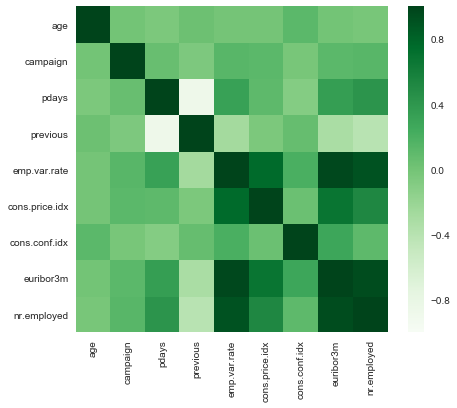

In [30]:
#Calculate correlations between numeric features
correlations = df_cleaned.corr()
#Make the figsize 7 x 6
plt.figure(figsize=(7,6))
#Plot heatmap of correlations
_ = sns.heatmap(correlations, cmap="Greens")

As can be seen, the economic indicators strongly correlate with each other. Additionally, the 'previous' and 'pdays' variables have a strong negative correlation, as expected, since the largest value of 'pdays' (999) corresponds to the smallest value of 'previous' (0).

If the strong correlation between the above variables is statistically significant, we may group or drop some of them, as having multiple strongly correlated variables in our prediction model will not substantially increase the accuracy of our model.

We'll test the statistical significance of the strongly correlated variables representing the state of economy, i.e. of the below pairs using permutation:

- 'emp.var.rate' - 'cons.price.idx'
- 'emp.var.rate' - 'euribor3m'
- 'emp.var.rate' - 'nr.employed'
- 'cons.price.idx' - 'euribor3m'
- 'cons.price.idx' - 'nr.employed'
- 'euribor3m' - 'nr.employed'

Additionally, we will check if our categorical variables are independent of each other using a chi-square test with a 95% level of confidence. We will need to check the following pairs (it doesn't make much sense to do a chi-square test for days of the week or months, and the dependence/independence of the outcome of the previous campaign should be checked by a more comprehensive method, like logistic regression).

- 'job' - 'marital'
- 'job' - 'education'
- 'job' - 'housing'
- 'job' - 'loan'
- 'job' - 'contact'
- 'marital' - 'education'
- 'marital' - 'housing'
- 'marital' - 'loan'
- 'marital' - 'contact'
- 'education' - 'housing'
- 'education' - 'loan'
- 'education' - 'contact'
- 'housing' - 'loan'
- 'housing' - 'contact'
- 'loan' - 'contact'  

Finally, we will perform a two-sample z-test to evaluate if the groups within our categorical variables differ significantly in whether they subscribe for the deposit or not. To do that, we will need to group different levels of each categorical variable into two groups and calculate the z-score and the p-value. The null hypothesis for the test will be that there's no difference between those two groups with respect to the subscription to the deposit. 

The detailed statistical analysis can be found [here](Capstone_project_1_stat_analysis.ipynb).

## Statistical Analysis - Conclusions

1) All correlations between the pairs of the numeric variables are statistically significant, since the p-values are very close to zero. For two of the pairs, though - namely, 'cons.price.idx' - 'euribor3m' and 'cons.price.idx' - 'nr.employed' - the correlation coefficient isn't high. We can potentially combine these variables into one weighted variable that would represent the state of the economy.

2) Bootstrapping of the mean age of the dataset demonstrated that the mean of our dataset is very close to the mean of the sampling distribution of the bootstrapped samples' means. Hence, our dataset represents the overall population well, and there's no skew towards any particular age.

3) Based on the results of the chi-squared tests, we conclude that:

- Job level depends on the level of education
- Job level is independend from the absence or presence of a housing loan
- Job level depends on the marital status
- Job level is independend from the absence or presence of a personal loan
- Job level depends on the type of contact
- Marital status depends on the level of education
- Marital status is independend from the absence or presence of a housing loan
- Marital status is independend from the absence or presence of a personal loan
- Marital status depends on the type of contact
- Level of education is independend from the absence or presence of a housing loan
- Level of education is independend from the absence or presence of a personal loan
- Level of education depends on the type of contact
- Absence or presence of a housing loan depends on the absence or presence of a personal loan
- Absence or presence of a housing loan depends on the type of contact
- Absence or presence of a personal loan is independent from the type of contact

4) Based on the results of the two-sample z-test, we conclude that:

- The subscription to deposit is different for different levels of salary
- The subscription to deposit is different for different marital statuses
- The subscription to deposit is different for different levels of education
- The subscription to deposit is different for people with and without a housing loan
- The subscription to deposit is the same for people with and without a personal loan
- The subscription to deposit is different for different modes of contact
- The subscription to deposit is different for different seasons of the year
- The subscription to deposit is the same for the first and the second half of the week

Based on the above, the personal loan and the day of the week variables are not significant predictors for the loan subscription. We will see if the logistic regression gives the same result.

## Fitting the prediction models

First, let's convert the levels of the categorical variables into dummy variables. We will exclude one dummy variable level for each categorical variable to avoid collinearity.

In [31]:
#Substituting the string predictor variable values with numbers
df_cleaned.y.replace(['yes'], 1, inplace=True)
df_cleaned.y.replace(['no'], 0, inplace=True)

df_cleaned1 = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned1.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


The simplest model to predict the categorical variable 'y' would be Logistic Regression. To identify how well this model works for our case, let's fit different types of the logistic regression model to identify the best model coefficients, using GradientSearchCV and pipelines:

In [32]:
#Splitting the variables into predictor and target variables
X = df_cleaned1.drop('y', axis=1)
y = df_cleaned1.y

#Setting up pipelines with a StandardScaler function to normalize the variables
pipelines = {
    'l1' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l1' , random_state=42)),
    'l2' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l2' , random_state=42)),
    #Setting the penalty for simple Logistic Regression as L2 to minimize the fitting time
    'logreg' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=42))
}

#Setting up a very large hyperparameter C for the non-penalized Logistic Regression (to cancel the regularization)
logreg_hyperparameters = {
    'logisticregression__C' : np.linspace(100000, 100001, 1),
    'logisticregression__fit_intercept' : [True, False]
}

#Setting up hyperparameters for the Logistic Regression with L1 penalty
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
    'logisticregression__fit_intercept' : [True, False]
}

#Setting up hyperparameters for the Logistic Regression with L2 penalty
l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
    'logisticregression__fit_intercept' : [True, False]
}

#Creating the dictionary of hyperparameters
hyperparameters = {
    'logreg' : logreg_hyperparameters,
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters
}

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Creating an empty dictionary for fitted models
fitted_logreg_models = {}

# Looping through model pipelines, tuning each with GridSearchCV and saving it to fitted_logreg_models
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #Fitting the model on X_train, y_train
    model.fit(X_train, y_train)
    
    #Storing the model in fitted_logreg_models[name] 
    fitted_logreg_models[name] = model
    
    #Printing the status of the fitting
    print(name, 'has been fitted.')

l2 has been fitted.
logreg has been fitted.
l1 has been fitted.


In [33]:
#Displaying the best_score_ for each fitted model
for name, model in fitted_logreg_models.items():
    print(name, model.best_score_ )

l2 0.905198903746
logreg 0.905198903746
l1 0.905198903746


All 3 models give very close prediction scores on the train dataset. Let's look at the accuracy scores that the models give on the test dataset:

In [34]:
#Creating an empty dictionary for predicted models
predicted_logreg_models = {}

#Predicting the response variables and displaying the prediction score
for name, model in fitted_logreg_models.items():
    y_pred = model.predict(X_test)
    predicted_logreg_models[name] = accuracy_score(y_test, y_pred)

predicted_logreg_models

{'l1': 0.90195698508041078,
 'l2': 0.90205386552993605,
 'logreg': 0.90195698508041078}

Defining the model with the highest accuracy score:

In [35]:
 max(predicted_logreg_models, key=lambda k: predicted_logreg_models[k])

'l2'

All models have pretty low accuracy scores, which means that logistic regression is probably not the best predictor model for this dataset, though it's probably the easiest to interpret. Out of 3 models, the L2-regularized model gives the best score. Let's look at the parameters of the L2 model:

In [36]:
fitted_logreg_models['l2'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=111.11200000000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

Next, let's apply the feature ranking with recursive feature elimination to identify the best number of features for the L2 model. We will use the parameters for the best-fitting L2 model above.

In [37]:
#Defining the model and parameters
model = LogisticRegression(C=111.11200000000001, penalty='l2', random_state=42)
#Defining the parameters of the recursive feature elimination selector. Step=1 means that the selector will remove
#one feature at a time
selector = RFECV(model, step=1, cv=10, n_jobs=-1)
selector = selector.fit(X, y)
#Displaying the selected columns
X.loc[:,selector.support_].columns

Index(['poutcome_success'], dtype='object')

In [38]:
#Displaying the ranking of the columns
selector.ranking_

array([37, 24, 35,  9, 27, 29, 28,  6, 32, 18, 11, 22, 17,  7, 14, 15, 39,
       21, 20, 16, 38, 23, 40, 30, 13, 34,  3,  8, 12,  2,  5, 31,  4, 33,
       10, 25, 26, 19, 36,  1])

Let's also plot the ROC curve:

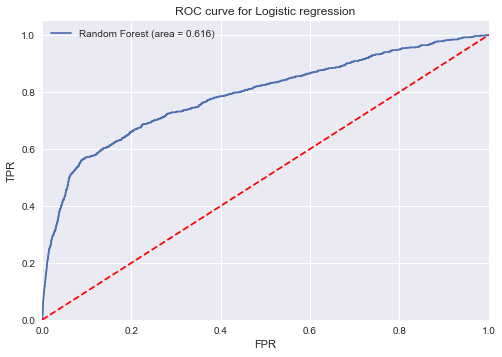

In [39]:
#Fitting the model
model.fit(X, y)
#Obtaining the ROC score
roc_auc = roc_auc_score(y_test, model.predict(X_test))
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest (area = %0.03f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic regression')
plt.legend(loc="upper left")
plt.show()

The area under the curve is ~0.62, which is not significantly higher than the area for a random-guess classifier (0.5).

In [64]:
#Creating the classification report
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.67      0.72      0.69      1138
          1       0.69      0.64      0.67      1132

avg / total       0.68      0.68      0.68      2270



## Analysing the results

As mentioned before, though logistic regression doesn't seem to be the best model for this dataset, it's one of the easiest to interpret. Let's look at the coefficients that the model assigns to the features in our dataset and see if there are any interesting predictors:

In [40]:
#The intercept of the final model
model.intercept_

array([ 0.00256199])

In [41]:
#Creating a mapping of the values of the coefficients to names
coef_list = {}
for i in range(40):
    coef_list[list(X.columns)[i]] = np.asscalar(pd.DataFrame(model.coef_)[i].values)

#Sorting the resulting dictionary in descending order
sorted(coef_list.items(), key=lambda x: -x[1])

[('month_mar', 0.5581624203013158),
 ('cons.price.idx', 0.39407135664599396),
 ('month_jul', 0.21403678487282346),
 ('day_of_week_wed', 0.143960851871565),
 ('job_student', 0.13740253102990718),
 ('job_no_active_income', 0.131722454304624),
 ('poutcome_success', 0.13092300008737093),
 ('education_university.degree', 0.1280833746096547),
 ('day_of_week_thu', 0.0739708056879277),
 ('month_dec', 0.07264055387587934),
 ('education_professional.course', 0.06422230036160795),
 ('month_jun', 0.061676981047353426),
 ('education_high.school', 0.056762006683830975),
 ('month_oct', 0.03771250206101586),
 ('euribor3m', 0.0354796016670263),
 ('day_of_week_tue', 0.03445965443135063),
 ('month_aug', 0.03301937165099987),
 ('marital_single', 0.03048660999990639),
 ('cons.conf.idx', 0.009941171452585086),
 ('poutcome_nonexistent', 0.000704977618127907),
 ('age', 0.0003382043535034772),
 ('marital_unknown', 0.0),
 ('loan_unknown', 0.0),
 ('housing_unknown', 0.0),
 ('pdays', -0.001184171028225193),
 ('nr

Loooks like the RFECV didn't remove 3 features, the coefficients of which are exactly zero ('marital_unknown', 'housing_unknown', 'loan_unknown'), so we'll ignore these features for the predictive model. The intercept doesn't contribute substantially to the probability of subscribing for a deposit and can be ignored for the interpretation purposes. Let's interpret the coefficients:

**Time of the year**

March and July seem to be the most effective months for a deposit subscription campaign, as they contributes the most to the log odds of the success of the campaign. Together, these 2 months increases the odds of success by almost 110% (e^(0.5+0.24)). June, December, October, and August also increase the log odds of the success of the campaign but on a significantly smaller scale.

At the same time, doing a deposit subscription campaign in May, September, or November decreses the odds of success, with May and November being the worst months.

The dependence of the odds of the campaign success on the time of the year, shown by the model, is consistent with the outcome of the two-sample z-test that we performed above.

**Day of the week**

The days of the weeks don't contribute a lot to the log odds of the success of the campaign. The most impactful day seems to be Wednesday, which increases the odds of success by about 17%. At the same time, calling about the deposit on Mondays decreases the odds of success by 24%.

The dependence of the odds of the campaign success on the day of the week, shown by the model, is not consistent with the outcome of the two-sample z-test that we performed above, so the difference shown by the model may not be statistically significant. 

**Economic indicators**

The model shows the customer price index to be one of the strongest predictors of the success of the deposit subscription campaign. A one-point increase in consumer price index increases the odds of success by 53%. This seem to make sense, as the increasing prices for goods presumably make people more open to saving money and earning interest. At the same time, a one-point decrease in employment variation rate drives a 31% decrease in the odds of subscribing to a deposit, which also makes sense--some people may be losing jobs or be worried about job perspectives, which means that they may need the money in their immediate reach. Other economic indicators ('cons.conf.idx', 'euribor3m', 'nr.employed') are not impacting the odds substantially.

**Education level**

In general, the level of education does not have a great impact on the odds of the subscription to a deposit. Among three levels of education, which were defined earlier, people with university degree have the highest odds of subscribing for a deposit. 

The dependence of the odds of the campaign success on the education level, shown by the model, is consistent with the outcome of the two-sample z-test that we performed above.

**Demographics and socioeconomic status**

Though marital status is not a strong predictor of the willingness to subscribe for a deposit, single individuals seem to be more inclined to subscribe, while marriage seems to cause an opposite effect. Age has almost no impact on the deposit subscription odds, and existing personal and housing loans seem to cause a negative effect on the subscription odds, which seems reasonable--if a person has a loan, that person would probably be less willing to subscribe to a deposit.

These results correspond to the findings of the two-sample z-test above, though the personal loan was not found to be a statistically significant predictor, so its influence on our model's outcomes may not be statistically significant.

**Job level**

Interestingly enough, the people without an active income seem to be the most willing to subscribe to a deposit--not having an income increases the deposit subscription odds by 14%. Being a student seems to increase the deposit subscription chances as well. At the same time, service, blue-collar and self-employed jobs seem to have a negative impact on the deposit subscription odds.

The job-related predictors of the model correspond to the findings of the two-sample z-test.
 
**Previous marketing campaigns participation**

Participation in a previous marketing campaign seems to increase the odds of subscribing to a deposit, so one may conclude that previous successful campaigns have a positive impact on the current campaign. At the same time, the influence of not being touched by a previous marketing campaign on the deposit subscription appears very small. The impact of the number of days since the previous contact appears to be very small as well, but in this case the reason for it may be the variable level of '999', which labels a nonexisting previous contact. We will look at the existing and new (never contacted before) customers separately to see if the model predictors differ for these subgroups.

The number of contacts performed during the current campaign seems to have a negative, though small, impact, which looks reasonable--one could expect that being contacted about the same product offering multiple times decreases the willingnes to purchase the product.

Finally, the mode of contact seems to be a strong predictor of the campaign outcome--a contact via telephone decreases the odds of the campaign success by 66%.

### Testing other predictive models

Since the L2 logistic regression didn't give us a high accuracy score, it makes sense to compare our model's performance with other predictive models that are widely used in the industry. Two of the most popular classification models are Random Forest and Gradient boost, since they generally give a better prediction quality. Let's fit these models and compare the scores:

In [42]:
#Setting up pipelines with a StandardScaler function to normalize the variables
pipelines = {
    'rf' : make_pipeline(StandardScaler(), 
                         RandomForestClassifier(random_state=42)),
    'gb' : make_pipeline(StandardScaler(), 
                         GradientBoostingClassifier(random_state=42))
}

#Setting up the "rule of thumb" hyperparameters for the Random Forest
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

#Setting up the "rule of thumb" hyperparameters for the Gradient Boost
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

#Creating the dictionary of hyperparameters
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

#Creating an empty dictionary for fitted models
fitted_alternative_models = {}

# Looping through model pipelines, tuning each with GridSearchCV and saving it to fitted_logreg_models
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #Fitting the model on X_train, y_train
    model.fit(X_train, y_train)
    
    #Storing the model in fitted_logreg_models[name] 
    fitted_alternative_models[name] = model
    
    #Printing the status of the fitting
    print(name, 'has been fitted.')

gb has been fitted.
rf has been fitted.


In [43]:
#Displaying the best_score_ for each fitted model
for name, model in fitted_alternative_models.items():
    print(name, model.best_score_ )

gb 0.906361597874
rf 0.898430362927


Gradient boosting model gives the best prediction score so far. Let's test these 2 models on the test dataset:

In [44]:
#Creating an empty dictionary for predicted models
predicted_alternative_models = {}

#Predicting the response variables and displaying the prediction score
for name, model in fitted_alternative_models.items():
    y_pred = model.predict(X_test)
    predicted_alternative_models[name] = accuracy_score(y_test, y_pred)

predicted_alternative_models

{'gb': 0.90089130013563268, 'rf': 0.89013757023832596}

Gradient boosting gives the best score here as well, so we'll pick it as our winner predictor model. Here are the parameters of the best-fitting model:

In [49]:
fitted_alternative_models['gb'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
  ...rs=100, presort='auto', random_state=42,
              subsample=1.0, verbose=0, warm_start=False))])

Let's create the confusion matrix and the classification report for the model:

In [55]:
#Defining and fitting the model
final_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_depth=5, random_state=42)

final_model.fit(X_train, y_train)

#Calculating the confusion matrix
confusion_matrix(y_test, final_model.predict(X_test), labels=[0,1])

array([[8969,  199],
       [ 824,  330]])

The confusion matrix shows that our model predicted 9,299 (90%) of data correctly.

In [52]:
#Creating the classification report
print(classification_report(y_test, final_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95      9168
          1       0.62      0.29      0.39      1154

avg / total       0.88      0.90      0.88     10322



Precision, recall and F1-score are high, which signifies a good prediction model.

## Addressing the imbalanced data classes

As mentioned before, only ~11% of the respondents to the current campaign have actually subscribed for a deposit, which makes the overall dataset highly imbalanced, and which can potentially lead to the model predicting just one class (the dominant one). Let's check if the model is actually predicting one class:

In [56]:
#Fitting the model
final_model_full_data = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_depth=5, random_state=42)
final_model_full_data.fit(X, y)

#Counting the number of the predicted classes
print(np.unique(final_model_full_data.predict(X)))

[0 1]


The model seems to be giving valid predictions. Still, the model score may be significantly lower on a balanced dataset. Let's test our model on a more balanced dataset in order to check if it's still a good predictor.  

Some of the most popular imbalance regularization approaches include up/downsampling and imputation. Since our data is not time-series based, imputation doesn't look like a good approach. Hence, we will create two datasets--an upsampled and a downsampled one--and test the L2 regression model.

### Upsampled dataset

Let's upsample our data, using the resample function from scikit-learh:

In [57]:
#Separating the imbalanced observations into 2 separate datasets
df_majority = df_cleaned1[df_cleaned1.y==0]
df_minority = df_cleaned1[df_cleaned1.y==1]

#Upsampling the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=30622, random_state=42) 

#Concatenating two datasets
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#New class counts
df_upsampled.y.value_counts()

1    30622
0    30622
Name: y, dtype: int64

Now, let's fit our model to the new dataset:

In [59]:
#Setting up the new features and the target variable
y_up = df_upsampled.y
X_up = df_upsampled.drop('y', axis=1)

#Defining the model once again
final_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_depth=5, random_state=42)

#Defining the steps in order to include the scaler
steps = [('scaler', StandardScaler()),
          ('gb', final_model)]

#Defining the pipeline
pipeline = Pipeline(steps)

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.3, random_state=42)

#Fitting the model on X_train, y_train
scaled_model = pipeline.fit(X_train, y_train)

#Predicting the y
y_pred = pipeline.predict(X_test)

#Calculating the accuracy score
print(accuracy_score(y_test, y_pred))

0.75683030369


In [60]:
#Creating the classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.87      0.78      9071
          1       0.83      0.65      0.73      9303

avg / total       0.77      0.76      0.75     18374



The accuracy of the model dropped slightly but remained high. Let's now try the downsample approach:

In [61]:
#Downsampling the majority class
df_majority_downsampled = resample(df_majority, replace=True, n_samples=3782, random_state=42) 

#Concatenating two datasets
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

#New class counts
df_downsampled.y.value_counts()

1    3782
0    3782
Name: y, dtype: int64

In [62]:
#Setting up the new features and the target variable
y_down = df_downsampled.y
X_down = df_downsampled.drop('y', axis=1)

#Defining the model once again
final_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_depth=5, random_state=42)

#Defining the steps in order to include the scaler
steps = [('scaler', StandardScaler()),
          ('gb', model)]

#Defining the pipeline
pipeline = Pipeline(steps)

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size=0.3, random_state=42)

#Fitting the model on X_train, y_train
scaled_model = pipeline.fit(X_train, y_train)

#Predicting the y
y_pred = pipeline.predict(X_test)

#Calculating the accuracy score
print(accuracy_score(y_test, y_pred))

0.719383259912


In [153]:
#Creating the classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.86      0.77      1138
          1       0.82      0.61      0.70      1132

avg / total       0.75      0.74      0.73      2270



The downsampled score is substantially lower than the scores for the initial or upsampled models, but it's still higher than the score of the logistic regression model. We conclude that the Random Forest model works well even if the dataset is significantly imbalanced.

## Testing the predictive model on new and existing customers

The dataset contains both the respondents who were contacted by a marketing campaign before, and the respondents who were never contacted before. Since the participation in a previous marketing campaign seems to increase the odds of subscribing to a deposit, it makes sense to fit the model to the new and existing customers separately to see if the prediction behavior changes. 

Let's separate the dataset into new and existing customers, using the 'pdays' variable, and fit our model. For the customers that were never contacted before, the value of the variable will be 999.

In [65]:
#Filtering the dataset
new_customers = df_cleaned.loc[df_cleaned['pdays'] == 999]
new_customers.y.value_counts()

0    30121
1     2918
Name: y, dtype: int64

In [66]:
#Generating the prediction-ready dataset
new_customers_cleaned = pd.get_dummies(new_customers, drop_first=True)
new_customers_cleaned.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


In [67]:
#Setting up the new features and the target variable
y_new = new_customers_cleaned.y
X_new = new_customers_cleaned.drop('y', axis=1)

#Defining the model once again
final_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_depth=5, random_state=42)

#Defining the steps in order to include the scaler
steps = [('scaler', StandardScaler()),
          ('gb', model)]

#Defining the pipeline
pipeline = Pipeline(steps)

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

#Fitting the model on X_train, y_train
scaled_model = pipeline.fit(X_train, y_train)

#Predicting the y
y_pred = pipeline.predict(X_test)

#Calculating the accuracy score
print(accuracy_score(y_test, y_pred))

0.902441485069


In [68]:
#Creating the classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.97      0.95      9021
          1       0.41      0.19      0.26       891

avg / total       0.88      0.90      0.89      9912



Fitting the model to the new customers' subset gives the similar high accuracy. Let's look at the existing cusomers' subset:

In [69]:
#Filtering the dataset
ex_customers = df_cleaned.loc[df_cleaned['pdays'] != 999]
ex_customers.y.value_counts()

1    864
0    501
Name: y, dtype: int64

The dataset is very small, so the model trained on it will most probably not fit a larger dataset well. Nonetheless, let's fit our model to this dataset to see what prediction accuracy it gives:

In [70]:
#Generating the prediction-ready dataset
ex_customers_cleaned = pd.get_dummies(ex_customers, drop_first=True)
ex_customers_cleaned.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
24108,37,1,6.0,1,-0.1,93.2,-42.0,4.286,5195.8,0,...,0,1,0,0,0,0,0,1,0,1
24264,48,1,4.0,1,-0.1,93.2,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,0,1
24279,42,1,4.0,1,-0.1,93.2,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,0,1
24397,50,1,3.0,1,-0.1,93.2,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,0,1
24482,36,2,4.0,1,-0.1,93.2,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,0,1


In [71]:
#Setting up the new features and the target variable
y_ex = ex_customers_cleaned.y
X_ex = ex_customers_cleaned.drop('y', axis=1)

#Defining the model once again
final_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_depth=5, random_state=42)

#Defining the steps in order to include the scaler
steps = [('scaler', StandardScaler()),
          ('gb', model)]

#Defining the pipeline
pipeline = Pipeline(steps)

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ex, y_ex, test_size=0.3, random_state=42)

#Fitting the model on X_train, y_train
scaled_model = pipeline.fit(X_train, y_train)

#Predicting the y
y_pred = pipeline.predict(X_test)

#Calculating the accuracy score
print(accuracy_score(y_test, y_pred))

0.629268292683


In [72]:
#Creating the classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.53      0.40      0.45       158
          1       0.67      0.77      0.72       252

avg / total       0.62      0.63      0.62       410



The accuracy score for the existing customers is much lower than for the new ones. As mentioned before, the dataset is too small to give a generalizable prediction, but the results can still indicate that the model fits the existing customers worse.

## Conclusion

The gradient boost model gave the best accuracy score among all tested models and a very good accuracy score overall. The model behaved reasonably well on both the upsampled and the downsampled datasets, which confirmed the robustness of the model. On the new customers' subset, the model gave the score that was comparable to the unbalanced model, while on the existing customers' subset the score was substantially low. Though the existing customers' subset is very small, the low accuracy score suggests that the final gradient boost model may not be the best predictor of the deposit subscription for the existing customers.